Deep neural network is an ANN which has two or mor hidden layer.
<img src="active function.png"/>

# High level API

In [52]:
import tensorflow as tf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
raw_data = pd.read_csv('~zyan/program/ml/datasets/home-credit-default-risk/application_train.csv')

In [54]:
colums_type = raw_data.dtypes
colums_drop = []
for item in colums_type.keys():
    if colums_type[item]=='object':
        colums_drop.append(item)

In [55]:
data_num = raw_data.copy()
data_num  = data_num.drop(colums_drop,axis=1)

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data_num,data_num['TARGET'],test_size=0.2)
x_train = x_train.drop('TARGET',axis=1)
x_test = x_test.drop('TARGET',axis=1)

In [6]:
x_train.isnull().any()

SK_ID_CURR                     False
CNT_CHILDREN                   False
AMT_INCOME_TOTAL               False
AMT_CREDIT                     False
AMT_ANNUITY                     True
AMT_GOODS_PRICE                 True
REGION_POPULATION_RELATIVE     False
DAYS_BIRTH                     False
DAYS_EMPLOYED                  False
DAYS_REGISTRATION              False
DAYS_ID_PUBLISH                False
OWN_CAR_AGE                     True
FLAG_MOBIL                     False
FLAG_EMP_PHONE                 False
FLAG_WORK_PHONE                False
FLAG_CONT_MOBILE               False
FLAG_PHONE                     False
FLAG_EMAIL                     False
CNT_FAM_MEMBERS                 True
REGION_RATING_CLIENT           False
REGION_RATING_CLIENT_W_CITY    False
HOUR_APPR_PROCESS_START        False
REG_REGION_NOT_LIVE_REGION     False
REG_REGION_NOT_WORK_REGION     False
LIVE_REGION_NOT_WORK_REGION    False
REG_CITY_NOT_LIVE_CITY         False
REG_CITY_NOT_WORK_CITY         False
L

In [57]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [58]:
pipeline = Pipeline([
    ('imputer',Imputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

In [59]:
x_train_prepared = pipeline.fit_transform(x_train)
x_test_prepared = pipeline.fit_transform(x_test)

In [60]:
np.isnan(x_train_prepared).any()

False

In [61]:
x_train_prepared = x_train_prepared.astype(np.float32)
x_test_prepared = x_test_prepared.astype(np.float32)

In [12]:
feature_columns =  tf.contrib.learn.infer_real_valued_columns_from_input(x_train_prepared)

In [13]:
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[100,300],n_classes=2,feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x16fb233c8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/1s/qtqrxn550bl_09sghrlnzkgr0000gn/T/tmphdr55s83'}


In [14]:
dnn_clf.fit(x=x_train_prepared,y=y_train,batch_size=100,steps=1000)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:te

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x16fb23208>, 'hidden_units': [100, 300], 'feature_columns': (_RealValuedColumn(column_name='', dimension=105, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x1159ae950>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
y_pred = list(dnn_clf.predict(x_test_prepared))

Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/1s/qtqrxn550bl_09sghrlnzkgr0000gn/T/tmphdr55s83/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [17]:
accuracy_score(y_pred,y_test)

0.9191258962977416

In [18]:
y_pred_pro = list(dnn_clf.predict_proba(x_test_prepared))

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/1s/qtqrxn550bl_09sghrlnzkgr0000gn/T/tmphdr55s83/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [19]:
y_pred_pro = np.array(y_pred_pro)

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [21]:
fpr_rf,tpr_rf,_ = roc_curve(y_test,y_pred_pro[:,1]) 

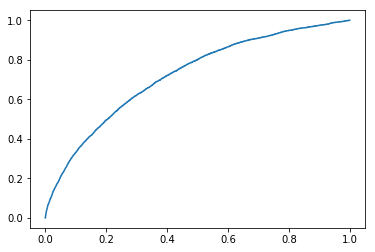

In [22]:
plt.plot(fpr_rf,tpr_rf)

In [23]:
dnn_clf.evaluate(x_test_prepared,y_test)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Starting evaluation at 2018-07-24-19:15:55
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/1s/qtqrxn550bl_09sghrlnzkgr0000gn/T/tmphdr55s83/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-24-19:15:57
INFO:tensorflow:Saving dict for glo

{'accuracy': 0.9191259,
 'accuracy/baseline_label_mean': 0.08063021,
 'accuracy/threshold_0.500000_mean': 0.9191259,
 'auc': 0.72106814,
 'auc_precision_recall': 0.20146617,
 'global_step': 1000,
 'labels/actual_label_mean': 0.08063021,
 'labels/prediction_mean': 0.07653305,
 'loss': 0.2574197,
 'precision/positive_threshold_0.500000_mean': 0.14285715,
 'recall/positive_threshold_0.500000_mean': 0.00060496066}

# Lower level API

In [62]:
n_inputs = 105
n_hidden1 = 300
n_hidden2 =100
n_outputs = 2

In [63]:
x = tf.placeholder(tf.float32,shape=(None,n_inputs),name='x')
y = tf.placeholder(tf.int64,shape=(None,),name='y')

In [64]:
def neutron_layer(x,n_neurons,name,activation=None):
    with tf.name_scope(name):
        n_inputs = int(x.shape[1])
        stddev = 2/np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs,n_neurons),stddev=stddev)
        w = tf.Variable(init,name='weights')
        b = tf.Variable(tf.zeros([n_neurons]),name='biases')
        z= tf.matmul(x,w)+b
        if activation=='relu':
            return tf.nn.relu(z)
        else:
            return z

In [65]:
with tf.name_scope('dnn'):
    hidden1 = neutron_layer(x_train_prepared,n_hidden1,'hidden1',activation='relu')
    hidden2 = neutron_layer(hidden1,n_hidden2,'hidden2',activation='relu')
    logits = neutron_layer(hidden2,n_outputs,'outputs')

In [66]:
init=tf.global_variables_initializer()

In [67]:
with tf.Session() as sess: 
    writer = tf.summary.FileWriter("./tmp/log", sess.graph)
    sess.run(init) 
    writer.close()

# Fine tuning NN hyperparameters

 There are many hyperparameters to tweak in neural network. It is better to use randomized search or specific tll as Oscar.

## Number of hidden layers

For many problems you can start with one or two hidden layers. For more complex problems,you can gradually ramp up the number of hidden layers until you start overfitting the training set.

## Number of neurons per hidden layer

A common practice is to size them to form a funnel, with fewer and fewer neurons at each layer. The rationale is that many low-level features can coalesce into far fewer high-level features.

You can use more layers and neurons then use early stopping  or dropout out to prevent it from overfitting.

## Activation function

In most cases you can use ReLU activation in hidden layers.
The softmax activation function is generrally a good choice for classification tasks. For regression tasks, you can use no activation function.